# Homework 4
_Created by Miguel Pardal B Malaca and Jorge Vieira on October 2021_

In this notebook, we are going to study the propagation of an electromagnetic wave in a magnetised plasma .

In this Simulation the plasma extends from $x=300$ to $x=475$ with a density $n_0$ corresponding to a plasma frequency $\omega_{p0}$. We launch a laser with a frequency of $\omega_{uh}/\sqrt{3}$ moving in the positive x-direction and polarized with an electric field in the y-direction. The laser front is initially at $x=175c/\omega_{p0}$.

Run the next two cells to initialize and run the simulation.

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import matplotlib.pyplot as plt
import numpy as np
import em1d
import numpy as np

# Time step
dt = 0.0499
tmax = 475.0

# Simulation box
nx  = 9500
box = 475

# Diagnostic frequency
ndump = 2

# Background plasma

ppc = 20 # Particles per cell

plasmastart=300.0
plasmaend=450.0
d_prof=em1d.Density( type = "slab", start = plasmastart, end = plasmaend)
electrons = em1d.Species( "electrons", -1.0, ppc, uth=[0.00,0.00,0.00], density = d_prof)

Ex_p=[]
Ey_p=[]

Ex_v=[]
Ey_v=[]
# Diagnostics
def rep( sim ):
    if ( sim.n % ndump == 0 ):
        # All electric field components
        #inside the plasma at x=8000/9500*475=400
        Ex_p.append(np.array(sim.emf.Ex)[8000])
        Ey_p.append(np.array(sim.emf.Ey)[8000])
        #before the plasma at x=3600/9500*475=180
        Ex_v.append(np.array(sim.emf.Ex)[3600])
        Ey_v.append(np.array(sim.emf.Ey)[3600])
        

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, species=(electrons), report = rep )

# Select open boundary conditions
sim.emf.bc_type = "open"

# Add laser pulse
w0 = np.sqrt(1+0.25)/np.sqrt(3) #w_uh/sqrt(3)
las=em1d.Laser( start = 175.0, rise=12.5, flat=150, fall=12.5, a0 = 0.001, omega0 = w0, polarization = 0.0 )
sim.add_laser(las )


B=[0.0, 0.0, 0.5]

ext = em1d.ExternalField(B_type = 'uniform', B_0 = B)

sim.emf.set_ext_fld( ext )

In [2]:
sim.run( tmax )


Running simulation up to t = 475 ...
n = 9520, t = 475.048
Done.


Next we plot $E_x(t,x)$ and $E_y(t,x)$ a fixed $x$ before the plasma and after the plasma. 

**Before progressing, make sure you correctly understand the plot first.**

(-0.0012909944487358058, 0.0012909944487358058)

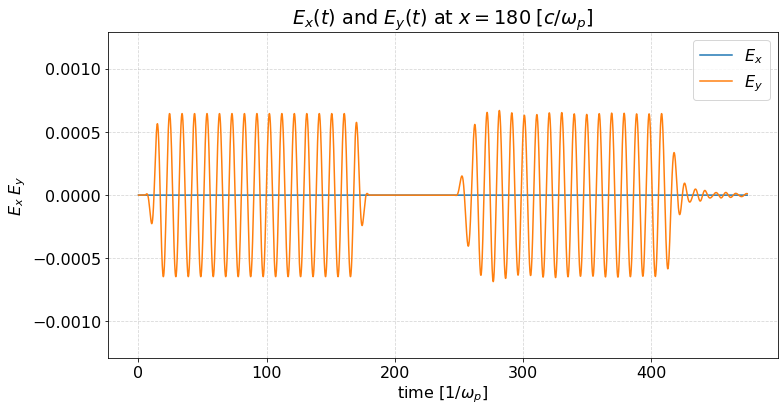

In [3]:
#before the plasma
fig=plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

plt.plot(np.linspace(0,tmax,len(Ex_v)),Ex_v,label="$E_x$")
plt.plot(np.linspace(0,tmax,len(Ex_v)),Ey_v,label="$E_y$")
#plt.xlim(200,300)
plt.xlabel("time $[1/\omega_p]$")
plt.ylabel("$E_x\; E_y$")
plt.legend()
plt.title("$E_x(t)$ and $E_y(t)$ at $x=180\;[c/\omega_p]$")
plt.grid(ls="--",alpha=0.5)
plt.ylim(-0.001*w0*2,2*0.001*w0)

(-0.0012909944487358058, 0.0012909944487358058)

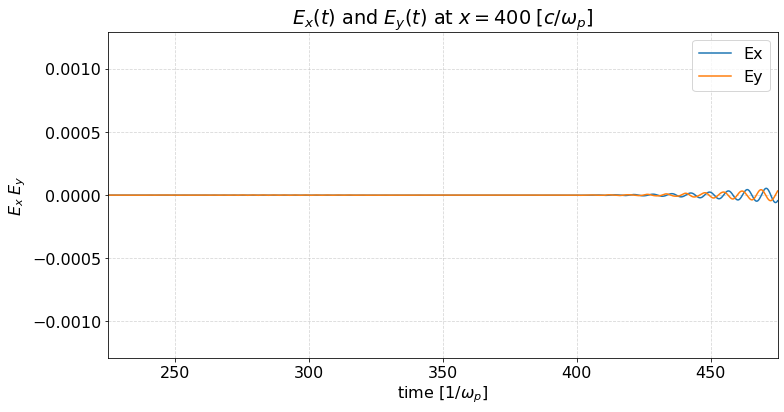

In [4]:
fig=plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

plt.plot(np.linspace(0,tmax,len(Ex_p)),Ex_p,label="Ex")
plt.plot(np.linspace(0,tmax,len(Ex_p)),Ey_p,label="Ey")
plt.xlim(225,tmax)
plt.xlabel("time $[1/\omega_p]$")
plt.ylabel("$E_x\; E_y$")
plt.title("$E_x(t)$ and $E_y(t)$ at $x=400\;[c/\omega_p]$")
plt.legend()
plt.grid(ls="--",alpha=0.5)
plt.ylim(-0.001*w0*2,0.001*w0*2)

Finally, we look at the polarization of the electric field by plotting with dots the electric field in different positions in the $E_y$ vs. $E_z$ plane. The different colors represent the electric field at three different positions: before the plasma, $x=180$ (blue); inside the plasma, $x=400$ (orange).

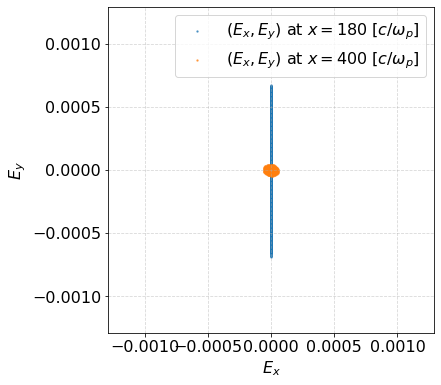

In [5]:
#inside the plasma
plt.figure(1,figsize=(8,6))
ax=plt.gca()
ax.set_aspect("equal")
ax.scatter(Ex_v,Ey_v,s=2,label="$(E_x,E_y)$ at $x=180\;[c/\omega_p]$",alpha=0.6)
ax.scatter(Ex_p,Ey_p,s=2,label="$(E_x,E_y)$ at $x=400\;[c/\omega_p]$",alpha=0.6)
ax.set_xlim(-2*w0*0.001,2*w0*0.001)
ax.set_ylim(-2*w0*0.001,2*w0*0.001)
ax.set_xlabel("$E_x$")
ax.set_ylabel("$E_y$")
ax.grid(ls="--",alpha=0.5)
ax.legend()